In [1]:
import pandas as pd
import numpy as np
import sqlite3
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#db = sqlite3.connect('data/NPPES_Data_Dissemination.sqlite')
query = "SELECT * FROM hop"

with sqlite3.connect('data/NPPES_Data_Dissemination.sqlite') as db: 
    hop_sqlite = pd.read_sql(query, db)
    
hop_sqlite

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
0,1508085911,1730166125,58,67,23.925,43.923
1,1508167040,1730166125,51,51,28.196,52.876
2,1508863549,1730166125,340,391,18.302,42.422
3,1508867870,1730166125,50,79,12.658,26.402
4,1508011040,1730166224,132,145,8.579,28.053
...,...,...,...,...,...,...
34176933,1417037664,1497939599,36,106,19.330,42.407
34176934,1417194903,1497939599,22,70,16.629,30.598
34176935,1417406372,1497939599,21,65,20.123,37.750
34176936,1417064825,1497940605,75,79,10.418,34.744


In [3]:
#db = sqlite3.connect('data/NPPES_Data_Dissemination.sqlite')
query = "SELECT * FROM nppes"

with sqlite3.connect('data/NPPES_Data_Dissemination.sqlite') as db: 
    nppes_sqlite = pd.read_sql(query, db)
    
nppes_sqlite

,NPI,EntityTypeCode,ProviderOrganizationName(LegalBusinessName),ProviderLastName(LegalName),ProviderFirstName,ProviderMiddleName,ProviderNamePrefixText,ProviderNameSuffixText,ProviderCredentialText,ProviderFirstLineBusinessPracticeLocationAddress,ProviderSecondLineBusinessPracticeLocationAddress,ProviderBusinessPracticeLocationAddressCityName,ProviderBusinessPracticeLocationAddressStateName,ProviderBusinessPracticeLocationAddressPostalCode,HealthcareProviderTaxonomyCode,HealthcareProviderPrimaryTaxonomySwitch
0,1750384210,1.0,None,GILMER,CARISSIA,None,None,None,PHARMD,1410 S 4TH ST,None,NASHVILLE,AR,718523009,183500000X,Y
1,1750384210,1.0,None,GILMER,CARISSIA,None,None,None,PHARMD,1410 S 4TH ST,None,NASHVILLE,AR,718523009,None,None
2,1750384210,1.0,None,GILMER,CARISSIA,None,None,None,PHARMD,1410 S 4TH ST,None,NASHVILLE,AR,718523009,None,None
3,1750384210,1.0,None,GILMER,CARISSIA,None,None,None,PHARMD,1410 S 4TH ST,None,NASHVILLE,AR,718523009,None,None
4,1750384210,1.0,None,GILMER,CARISSIA,None,None,None,PHARMD,1410 S 4TH ST,None,NASHVILLE,AR,718523009,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760360,1104850130,2.0,HEIKKI E KOSTAMAA MD PC,None,None,None,None,None,None,28 WHITE BRIDGE PIKE,STE. 208,NASHVILLE,TN,37205,None,None
9760361,1104850130,2.0,HEIKKI E KOSTAMAA MD PC,None,None,None,None,None,None,28 WHITE BRIDGE PIKE,STE. 208,NASHVILLE,TN,37205,None,None
9760362,1104850130,2.0,HEIKKI E KOSTAMAA MD PC,None,None,None,None,None,None,28 WHITE BRIDGE PIKE,STE. 208,NASHVILLE,TN,37205,None,None
9760363,1104850130,2.0,HEIKKI E KOSTAMAA MD PC,None,None,None,None,None,None,28 WHITE BRIDGE PIKE,STE. 208,NASHVILLE,TN,37205,None,None


First, build a profile of providers referring patients to the major hospitals in Nashville. Are certain specialties more likely to refer to a particular hospital over the others?

In [4]:
db.close

<function Connection.close>

In [5]:
db = sqlite3.connect('data/NPPES_Data_Dissemination.sqlite')

providers_query = """

SELECT NPI, [ProviderOrganizationName(LegalBusinessName)], 
ProviderBusinessPracticeLocationAddressPostalCode, HealthcareProviderTaxonomyCode,
HealthcareProviderPrimaryTaxonomySwitch 

FROM [nppes] WHERE EntityTypeCode = 2 AND ProviderBusinessPracticeLocationAddressCityName = 'NASHVILLE' 
AND ProviderBusinessPracticeLocationAddressStateName = 'TN' AND HealthcareProviderTaxonomyCode IS NOT NULL
AND HealthcareProviderPrimaryTaxonomySwitch = 'Y'
"""
    
provider = pd.read_sql(providers_query, db)
    
provider

,NPI,ProviderOrganizationName(LegalBusinessName),ProviderBusinessPracticeLocationAddressPostalCode,HealthcareProviderTaxonomyCode,HealthcareProviderPrimaryTaxonomySwitch
0,1538270673,METROPOLITAN GOVERNMENT OF NASHVILLE AND DAVID...,372031503,251K00000X,Y
1,1891834198,"RADNOR MEDICAL GROUP, INC.",372115869,208000000X,Y
2,1700900040,JEFFREY D HORN MD PLLC,372032000,207W00000X,Y
3,1346440781,STERLING PRIMARY CARE 2LLC,372031582,261Q00000X,Y
4,1548450513,"MARY A. MCELANEY, M.D.",372114854,207RP1001X,Y
...,...,...,...,...,...
2979,1720785884,"EMERGENCY MEDICINE SERVICES OF TN, PC",372031538,207P00000X,Y
2980,1366193013,"COMFORT MEDICAL, LLC",372172009,332B00000X,Y
2981,1982301065,"HOSPITAL MEDICINE SERVICES OF TN, LLC",372031538,208M00000X,Y
2982,1710638523,"VORI MEDICAL NY, PLLC",372043622,208100000X,Y


In [6]:
db.close

<function Connection.close>

In [7]:
taxonomy_nucc = pd.read_csv('data/nucc_taxonomy_230.csv', encoding= 'unicode_escape')

##taxonomy_nucc1 = taxonomy_nucc[taxonomy_nucc['Grouping'] == 'Hospital Units']
taxonomy_nucc

,Code,Grouping,Classification,Specialization,Definition,Notes,Display Name,Section
0,193200000X,Group,Multi-Specialty,NaN,A business group of one or more individual pra...,[7/1/2003: new],Multi-Specialty Group,Individual
1,193400000X,Group,Single Specialty,NaN,A business group of one or more individual pra...,[7/1/2003: new],Single Specialty Group,Individual
2,207K00000X,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,An allergist-immunologist is trained in evalua...,"Source: American Board of Medical Specialties,...",Allergy & Immunology Physician,Individual
3,207KA0200X,Allopathic & Osteopathic Physicians,Allergy & Immunology,Allergy,"A physician who specializes in the diagnosis, ...",Source: National Uniform Claim Committee,Allergy Physician,Individual
4,207KI0005X,Allopathic & Osteopathic Physicians,Allergy & Immunology,Clinical & Laboratory Immunology,An allergy and immunology physician who specia...,"Source: National Uniform Claim Committee, 2022...",Clinical & Laboratory Immunology (Allergy & Im...,Individual
...,...,...,...,...,...,...,...,...
868,343800000X,Transportation Services,Secured Medical Transport (VAN),NaN,A public or privately owned transportation ser...,NaN,Secured Medical Transport (VAN),Non-Individual
869,344600000X,Transportation Services,Taxi,NaN,A land commercial vehicle used for the transpo...,NaN,Taxi,Non-Individual
870,347D00000X,Transportation Services,Train,NaN,An organization or business licensed to provid...,NaN,Train,Non-Individual
871,347E00000X,Transportation Services,Transportation Broker,NaN,An organization that provides transportation f...,Source: Section 6083 of the Deficit Reduction ...,Transportation Broker,Non-Individual


In [8]:
provider = pd.DataFrame(provider)
provider = provider.merge(taxonomy_nucc, left_on = "HealthcareProviderTaxonomyCode", right_on = "Code")
provider_hospitals = provider[provider['Grouping'] == 'Hospitals'] 
provider_hospitals

,NPI,ProviderOrganizationName(LegalBusinessName),ProviderBusinessPracticeLocationAddressPostalCode,HealthcareProviderTaxonomyCode,HealthcareProviderPrimaryTaxonomySwitch,Code,Grouping,Classification,Specialization,Definition,Notes,Display Name,Section
1024,1609056399,VANDERBILT CHILDREN'S,372320001,282NC2000X,Y,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
1025,1326224015,VANDERBILT CHILDRENS HOSPITAL,372320005,282NC2000X,Y,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
1026,1164609319,VANDERBILT MEDICAL CENTER,372320034,282NC2000X,Y,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
1027,1255577466,MONROE CARELL JR VANDERBILT CHILDREN'S HOSPITAL,372320005,282NC2000X,Y,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
1028,1003211145,MONROE CARELL JR. CHILDREN'S HOSPITAL AT VANDE...,372320005,282NC2000X,Y,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1528033404,TENNESSEE VALLEY HEALTH CARE9(TVHS),372122637,284300000X,Y,284300000X,Hospitals,Special Hospital,NaN,A designation by the AHA of a hospital whose p...,"Source: AHA Guide, Registration section, p. A5.",Special Hospital,Non-Individual
2934,1336119627,BAPTIST WOMEN'S HEALTH CENTER LLC,372032065,284300000X,Y,284300000X,Hospitals,Special Hospital,NaN,A designation by the AHA of a hospital whose p...,"Source: AHA Guide, Registration section, p. A5.",Special Hospital,Non-Individual
2936,1568477990,DEPARTMENT OF VETERANS AFFAIRS NASHVILLE,372122637,286500000X,Y,286500000X,Hospitals,Military Hospital,NaN,A health care facility operated by the Departm...,NaN,Military Hospital,Non-Individual
2960,1215937982,SELECT SPECIALTY HOSPITAL - NASHVILLE LLC,372360001,282E00000X,Y,282E00000X,Hospitals,Long Term Care Hospital,NaN,Long-term care hospitals (LTCHs) furnish exten...,Source: American Hospital Association [7/1/20...,Long Term Care Hospital,Non-Individual


Merging data to be able to get 3. question done. 

In [9]:
provider

#provider[provider['ProviderOrganizationName(LegalBusinessName)'] == 'VANDERBILT MEDICAL CENTER'] 

,NPI,ProviderOrganizationName(LegalBusinessName),ProviderBusinessPracticeLocationAddressPostalCode,HealthcareProviderTaxonomyCode,HealthcareProviderPrimaryTaxonomySwitch,Code,Grouping,Classification,Specialization,Definition,Notes,Display Name,Section
0,1538270673,METROPOLITAN GOVERNMENT OF NASHVILLE AND DAVID...,372031503,251K00000X,Y,251K00000X,Agencies,Public Health or Welfare,NaN,Definition to come...,NaN,Public Health or Welfare Agency,Non-Individual
1,1356504153,TENNESSE DEPARTMENT OF HEALTH,372470001,251K00000X,Y,251K00000X,Agencies,Public Health or Welfare,NaN,Definition to come...,NaN,Public Health or Welfare Agency,Non-Individual
2,1225277783,METROPOLITAN NASHVILLE PUBLIC HEALTH DEPARTMENT,372031503,251K00000X,Y,251K00000X,Agencies,Public Health or Welfare,NaN,Definition to come...,NaN,Public Health or Welfare Agency,Non-Individual
3,1265594022,"TECHNOVISION, LLC.",372032941,251K00000X,Y,251K00000X,Agencies,Public Health or Welfare,NaN,Definition to come...,NaN,Public Health or Welfare Agency,Non-Individual
4,1396058269,MEHARRY MEDICAL COLLEGE,372082918,251K00000X,Y,251K00000X,Agencies,Public Health or Welfare,NaN,Definition to come...,NaN,Public Health or Welfare Agency,Non-Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,1629598453,"FEMALE PHYSICIANS OF TENNESSEE, P.C.",372031515,2088F0040X,Y,2088F0040X,Allopathic & Osteopathic Physicians,Urology,Female Pelvic Medicine and Reconstructive Surgery,A subspecialist in Female Pelvic Medicine and ...,"Source: American Board of Medical Specialties,...",Female Pelvic Medicine and Reconstructive Surg...,Individual
2980,1477186336,NATIONAL ADDICTION SPECIALISTS LLC,372142403,207RA0401X,Y,207RA0401X,Allopathic & Osteopathic Physicians,Internal Medicine,Addiction Medicine,An internist doctor of osteopathy that special...,Source: American Osteopathic Board of Internal...,Addiction Medicine (Internal Medicine) Physician,Individual
2981,1528778263,EMPOWER MUSIC THERAPY LLC,372281906,225A00000X,Y,225A00000X,"Respiratory, Developmental, Rehabilitative and...",Music Therapist,NaN,Music therapists use music interventions to as...,Source: American Music Therapy Association,Music Therapist,Individual
2982,1053069559,MIDDLE TENNESSEE IMAGING LLC,372032220,261QR0206X,Y,261QR0206X,Ambulatory Health Care Facilities,Clinic/Center,"Radiology, Mammography",Definition to come...,NaN,Mammography Clinic/Center,Non-Individual



- Determine which professionals Vanderbilt Hospital should reach out to in the Nashville area to expand their own patient volume.
First, research which professionals are sending significant numbers of patients only to competitor hospitals (such as TriStar Centennial Medical Center).

In [10]:
db = sqlite3.connect('data/NPPES_Data_Dissemination.sqlite')

competitors = """
SELECT h.from_npi, h.to_npi, h.patient_count, h.transaction_count, ProviderBusinessPracticeLocationAddressCityName AS city_name, [ProviderOrganizationName(LegalBusinessName)] AS Business_name, 
ProviderFirstName AS First_Name, [ProviderLastName(LegalName)] AS Last_Name
        
FROM nppes AS n
INNER JOIN hop AS h
ON n.NPI = h.to_npi



"""
with sqlite3.connect('data/NPPES_Data_Dissemination.sqlite') as db: 
    competitors = pd.read_sql(competitors, db)
    

In [11]:
competitors

,from_npi,to_npi,patient_count,transaction_count,city_name,Business_name,First_Name,Last_Name
0,1295726032,1922001957,83,89,NASHVILLE,None,RICHARD,PRESLEY
1,1578584199,1922001957,129,149,NASHVILLE,None,RICHARD,PRESLEY
2,1295726032,1922001957,83,89,NASHVILLE,None,RICHARD,PRESLEY
3,1578584199,1922001957,129,149,NASHVILLE,None,RICHARD,PRESLEY
4,1295726032,1922001957,83,89,NASHVILLE,None,RICHARD,PRESLEY
...,...,...,...,...,...,...,...,...
53854135,1811955917,1104850130,52,90,NASHVILLE,HEIKKI E KOSTAMAA MD PC,None,None
53854136,1861479545,1104850130,195,287,NASHVILLE,HEIKKI E KOSTAMAA MD PC,None,None
53854137,1871529982,1104850130,80,81,NASHVILLE,HEIKKI E KOSTAMAA MD PC,None,None
53854138,1922039346,1104850130,912,2042,NASHVILLE,HEIKKI E KOSTAMAA MD PC,None,None


In [116]:
db = sqlite3.connect('data/NPPES_Data_Dissemination.sqlite')

hospitals = """
SELECT NPI, h.from_npi, h.to_npi, 
h.patient_count, h.transaction_count, 
Specialization,
p.[ProviderOrganizationName(LegalBusinessName)] AS Business_name, 
Grouping
        
FROM provider AS p
INNER JOIN hop AS h
ON p.NPI = h.to_npi
WHERE Grouping = 'Hospitals'
ORDER BY h.patient_count DESC;

"""
with sqlite3.connect('data/NPPES_Data_Dissemination.sqlite') as db: 
    hospitals = pd.read_sql(hospitals, db)

In [117]:
hospitals

,NPI,from_npi,to_npi,patient_count,transaction_count,Specialization,Business_name,Grouping
0,1396882205,1104202761,1396882205,62104,223846,None,VANDERBILT UNIVERSITY MEDICAL CENTER,Hospitals
1,1629025648,1093741464,1629025648,14423,36425,None,SAINT THOMAS WEST HOSPITAL,Hospitals
2,1023055126,1861478489,1023055126,14064,29637,None,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Hospitals
3,1629025648,1437194669,1629025648,13787,52332,None,SAINT THOMAS WEST HOSPITAL,Hospitals
4,1780778969,1093741464,1780778969,12610,26662,None,SAINT THOMAS WEST HOSPITAL,Hospitals
...,...,...,...,...,...,...,...,...
7851,1720032345,1093738536,1720032345,12,50,None,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Hospitals
7852,1720032345,1356652200,1720032345,12,50,None,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Hospitals
7853,1558408633,1508060872,1558408633,12,154,None,VANDERBILT UNIVERSITY MEDICAL CENTER,Hospitals
7854,1396882205,1427304617,1396882205,11,51,None,VANDERBILT UNIVERSITY MEDICAL CENTER,Hospitals


In [118]:
hospitals = pd.DataFrame(hospitals)
hospitals

,NPI,from_npi,to_npi,patient_count,transaction_count,Specialization,Business_name,Grouping
0,1396882205,1104202761,1396882205,62104,223846,None,VANDERBILT UNIVERSITY MEDICAL CENTER,Hospitals
1,1629025648,1093741464,1629025648,14423,36425,None,SAINT THOMAS WEST HOSPITAL,Hospitals
2,1023055126,1861478489,1023055126,14064,29637,None,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Hospitals
3,1629025648,1437194669,1629025648,13787,52332,None,SAINT THOMAS WEST HOSPITAL,Hospitals
4,1780778969,1093741464,1780778969,12610,26662,None,SAINT THOMAS WEST HOSPITAL,Hospitals
...,...,...,...,...,...,...,...,...
7851,1720032345,1093738536,1720032345,12,50,None,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Hospitals
7852,1720032345,1356652200,1720032345,12,50,None,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Hospitals
7853,1558408633,1508060872,1558408633,12,154,None,VANDERBILT UNIVERSITY MEDICAL CENTER,Hospitals
7854,1396882205,1427304617,1396882205,11,51,None,VANDERBILT UNIVERSITY MEDICAL CENTER,Hospitals


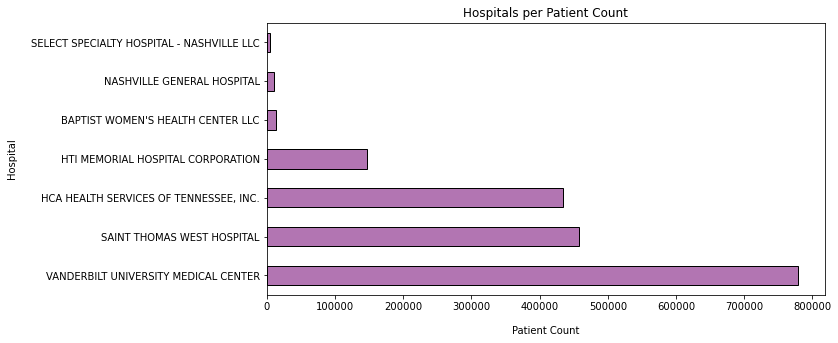

In [145]:
hospitals_plot = hospitals.groupby(['Business_name'])['patient_count'].sum().sort_values(ascending= False).head(7).plot(kind = 'barh', color = (0.5,0.1,0.5,0.6), edgecolor='black', figsize=(10, 5))
plt.xlabel("Patient Count", labelpad=14)
plt.ylabel("Hospital", labelpad=14)
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.title("Hospitals per Patient Count")
hospitals_plot;

In [119]:
db = sqlite3.connect('data/NPPES_Data_Dissemination.sqlite')

specialist = """
SELECT NPI, h.from_npi, h.to_npi, 
h.patient_count, h.transaction_count, 
Specialization,
p.[ProviderOrganizationName(LegalBusinessName)] AS Business_name, 
Grouping
        
FROM provider AS p
INNER JOIN hop AS h
ON p.NPI = h.to_npi
WHERE Specialization IS NOT NULL 
ORDER BY h.patient_count DESC;
"""
with sqlite3.connect('data/NPPES_Data_Dissemination.sqlite') as db: 
    specialist = pd.read_sql(specialist, db)

In [120]:
specialist

,NPI,from_npi,to_npi,patient_count,transaction_count,Specialization,Business_name,Grouping
0,1003863580,1124075635,1003863580,192118,316456,Anatomic Pathology & Clinical Pathology,"ASSOCIATED PATHOLOGISTS, LLC",Allopathic & Osteopathic Physicians
1,1003863580,1093753303,1003863580,127792,234741,Anatomic Pathology & Clinical Pathology,"ASSOCIATED PATHOLOGISTS, LLC",Allopathic & Osteopathic Physicians
2,1003863580,1235186800,1003863580,118714,212053,Anatomic Pathology & Clinical Pathology,"ASSOCIATED PATHOLOGISTS, LLC",Allopathic & Osteopathic Physicians
3,1003863580,1609848563,1003863580,29321,30593,Anatomic Pathology & Clinical Pathology,"ASSOCIATED PATHOLOGISTS, LLC",Allopathic & Osteopathic Physicians
4,1861478489,1245393057,1861478489,19602,36881,Diagnostic Radiology,RADIOLOGY ALLIANCE PC,Allopathic & Osteopathic Physicians
...,...,...,...,...,...,...,...,...
25614,1366554180,1578509998,1366554180,11,53,End-Stage Renal Disease (ESRD) Treatment,"DIALYSIS ASSOCIATES, LLC",Ambulatory Health Care Facilities
25615,1700878360,1487108668,1700878360,11,51,Nephrology,"NEPHROLOGY ASSOCIATES, PC",Allopathic & Osteopathic Physicians
25616,1124443403,1346765476,1124443403,11,88,Hospice and Palliative Medicine,"ASPIRE HEALTH MEDICAL PARTNERS, PC",Allopathic & Osteopathic Physicians
25617,1124443403,1700143047,1124443403,11,53,Hospice and Palliative Medicine,"ASPIRE HEALTH MEDICAL PARTNERS, PC",Allopathic & Osteopathic Physicians


In [121]:
specialist = pd.DataFrame(specialist)
specialist

,NPI,from_npi,to_npi,patient_count,transaction_count,Specialization,Business_name,Grouping
0,1003863580,1124075635,1003863580,192118,316456,Anatomic Pathology & Clinical Pathology,"ASSOCIATED PATHOLOGISTS, LLC",Allopathic & Osteopathic Physicians
1,1003863580,1093753303,1003863580,127792,234741,Anatomic Pathology & Clinical Pathology,"ASSOCIATED PATHOLOGISTS, LLC",Allopathic & Osteopathic Physicians
2,1003863580,1235186800,1003863580,118714,212053,Anatomic Pathology & Clinical Pathology,"ASSOCIATED PATHOLOGISTS, LLC",Allopathic & Osteopathic Physicians
3,1003863580,1609848563,1003863580,29321,30593,Anatomic Pathology & Clinical Pathology,"ASSOCIATED PATHOLOGISTS, LLC",Allopathic & Osteopathic Physicians
4,1861478489,1245393057,1861478489,19602,36881,Diagnostic Radiology,RADIOLOGY ALLIANCE PC,Allopathic & Osteopathic Physicians
...,...,...,...,...,...,...,...,...
25614,1366554180,1578509998,1366554180,11,53,End-Stage Renal Disease (ESRD) Treatment,"DIALYSIS ASSOCIATES, LLC",Ambulatory Health Care Facilities
25615,1700878360,1487108668,1700878360,11,51,Nephrology,"NEPHROLOGY ASSOCIATES, PC",Allopathic & Osteopathic Physicians
25616,1124443403,1346765476,1124443403,11,88,Hospice and Palliative Medicine,"ASPIRE HEALTH MEDICAL PARTNERS, PC",Allopathic & Osteopathic Physicians
25617,1124443403,1700143047,1124443403,11,53,Hospice and Palliative Medicine,"ASPIRE HEALTH MEDICAL PARTNERS, PC",Allopathic & Osteopathic Physicians


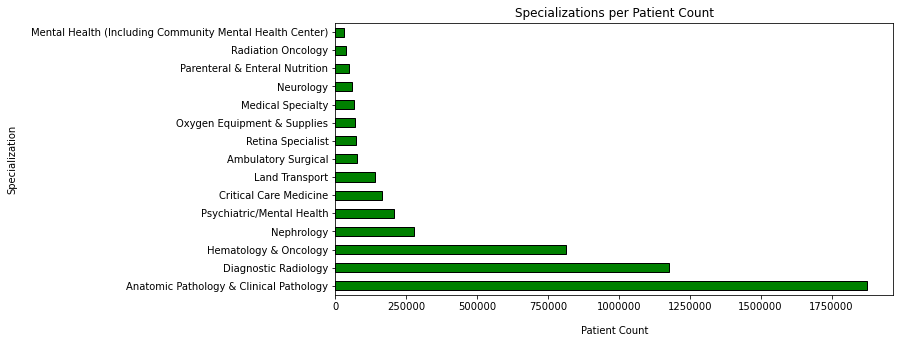

In [148]:
specialization_plot = specialist.groupby(['Specialization'])['patient_count'].sum().sort_values(ascending= False).head(15).plot(kind = 'barh', color='green', edgecolor='black', figsize=(10, 5))
plt.xlabel("Patient Count", labelpad=14)
plt.ylabel("Specialization", labelpad=14)
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.title("Specializations per Patient Count")

                                                                                                                                                                                                                                                       
specialization_plot;

In [22]:
plot = hospitals.groupby(['Business_name'])['patient_count'].sum().sort_values(ascending= False).head(15)